In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import textstat as ts
from nltk.corpus import stopwords
from textblob import Word
from textblob import TextBlob
stop = stopwords.words('english')

In [2]:
#Importing Raw Data
reviews_df = pd.read_csv('D:\\NCI Notes\\Thesis\\Data\\Reviews.csv', encoding = 'cp1252')
restaurant_df = pd.read_csv('D:\\NCI Notes\\Thesis\\Data\\Restaurant.csv', encoding = 'cp1252')

In [3]:
#Checking for Missing values - Reviews Dataset
column_names = reviews_df.columns
print(column_names) #Column names
totalCells = np.product(reviews_df.shape) #Calculate total number of cells in dataframe
missingCount = reviews_df.isnull().sum() #Count number of missing values per column
totalMissing = missingCount.sum() #Calculate total number of missing values 
print("The Reviews dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.") #Calculate percentage of missing values


Index(['date', 'reviewID', 'reviewerID', 'reviewContent', 'rating',
       'usefulCount', 'coolCount', 'funnyCount', 'flagged', 'restaurantID'],
      dtype='object')
The Reviews dataset contains 0.0 % missing values.


In [4]:
#Replace any missing values with NA and Drop NA values
reviews_df.replace(' ',np.nan, inplace = True)
reviews_df = reviews_df.dropna()


In [5]:
#Deleting rows flagged as NR and YR
reviews_df = reviews_df[reviews_df.flagged != 'NR']
reviews_df = reviews_df[reviews_df.flagged != 'YR']


In [6]:
#Encoding categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
reviews_df['flagged_code'] = le.fit_transform(reviews_df['flagged'])

In [7]:
#Unique Id column
reviews_df['ReviewID'] = reviews_df.index

#Adding review content wordcount feature
reviews_df['WordCount_Review'] = reviews_df['reviewContent'].apply(lambda comment: len(comment.split()))

#Drop unwanted columns
reviews_df = reviews_df.drop(columns=['date','reviewID','coolCount','funnyCount'], axis = 1)

#Renaming Columns
reviews_df.rename(columns={'rating':'ReviewRating','usefulCount':'UsefulCount_Review'}, inplace = True)


In [8]:
#Renaming Columns - Restaurant dataset
restaurant_df.rename(columns={'reviewCount':'TotalReviewCountofRestaurant','filReviewCount':'FakeReviewCountRestaurant','rating':'AggRestaurantRating'}, inplace = True)
rest_df = restaurant_df[['restaurantID','TotalReviewCountofRestaurant','FakeReviewCountRestaurant','AggRestaurantRating']]


In [9]:
#Joining the two datasets
combined_df = pd.merge(reviews_df,rest_df, how = 'inner', on = 'restaurantID')
combined_df = pd.DataFrame(combined_df)
combined_df.to_csv(r'D:\\NCI Notes\\Thesis\\Data\\FinalMergedDataset.csv')

In [10]:
combined_df.head()

,reviewerID,reviewContent,ReviewRating,UsefulCount_Review,flagged,restaurantID,flagged_code,ReviewID,WordCount_Review,TotalReviewCountofRestaurant,FakeReviewCountRestaurant,AggRestaurantRating
0,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0,N,pbEiXam9YJL3neCYHGwLUA,0,0,871,841,136,4.5
1,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0,N,pbEiXam9YJL3neCYHGwLUA,0,1,66,841,136,4.5
2,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,2,N,pbEiXam9YJL3neCYHGwLUA,0,2,45,841,136,4.5
3,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,8,N,pbEiXam9YJL3neCYHGwLUA,0,3,358,841,136,4.5
4,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,1,N,pbEiXam9YJL3neCYHGwLUA,0,4,172,841,136,4.5


In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67016 entries, 0 to 67015
Data columns (total 12 columns):
reviewerID                      67016 non-null object
reviewContent                   67016 non-null object
ReviewRating                    67016 non-null int64
UsefulCount_Review              67016 non-null int64
flagged                         67016 non-null object
restaurantID                    67016 non-null object
flagged_code                    67016 non-null int32
ReviewID                        67016 non-null int64
WordCount_Review                67016 non-null int64
TotalReviewCountofRestaurant    67016 non-null int64
FakeReviewCountRestaurant       67016 non-null int64
AggRestaurantRating             67016 non-null float64
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 6.4+ MB


In [12]:
combined_df.describe()

,ReviewRating,UsefulCount_Review,flagged_code,ReviewID,WordCount_Review,TotalReviewCountofRestaurant,FakeReviewCountRestaurant,AggRestaurantRating
count,67016.000000,67016.000000,67016.000000,67016.000000,67016.000000,67016.000000,67016.000000,67016.000000
mean,3.977170,0.894204,0.123866,34158.234228,138.513474,764.700639,98.118285,3.979550
std,1.097181,2.038062,0.329431,25414.508686,119.616426,411.712029,43.649294,0.242817
min,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,3.500000
25%,4.000000,0.000000,0.000000,16754.750000,58.000000,480.000000,65.000000,4.000000
50%,4.000000,0.000000,0.000000,33508.500000,106.000000,658.000000,89.000000,4.000000
75%,5.000000,1.000000,0.000000,50262.250000,183.000000,956.000000,118.000000,4.000000
max,5.000000,84.000000,1.000000,506191.000000,1021.000000,2122.000000,241.000000,5.000000


In [13]:
#Text preprocessing and new feature addition
#Remove numbers
combined_df['reviewContentNew'] = combined_df['reviewContent'].apply(lambda x: ''.join([i for i in x if not i.isdigit()])) 
#Remove punctuations
combined_df['reviewContentNew'] = combined_df['reviewContentNew'].str.replace('[^\w\s]', '')
#Lowercasing
combined_df['reviewContentNew'] = combined_df['reviewContentNew'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#stopword count
combined_df['stopwordsCount'] = combined_df['reviewContentNew'].apply(lambda x: len([x for x in x.split() if x in stop]))
#removing stopwords
combined_df['reviewContentNew'] = combined_df['reviewContentNew'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#lemmatizing
combined_df['reviewContentNew'] = combined_df['reviewContentNew'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [14]:
combined_df['reviewContentNew'].head()

0    unlike next wed eaten previous night dish comp...
1    probably one best meal ive ever performance fo...
2    service impeccable experience presentation coo...
3    problem place like given exhorbitant cost medi...
4    idea write review dining alinea brings whole d...
Name: reviewContentNew, dtype: object

In [15]:
#Adding new numeric features - Feature Engineering
#Rating features and Text based statistics
#AggRating Deviation
combined_df['DeviationfromAggRating'] = abs(combined_df['AggRestaurantRating'] - combined_df['ReviewRating'])
#Character count
combined_df['charCount'] = combined_df['reviewContent'].apply(len)
#uppercase count
combined_df['uppercaseCount'] = combined_df['reviewContent'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
#special char count
combined_df['specialCharCount'] = combined_df['reviewContent'].apply(lambda comment: sum (comment.count(w) for w in '[\w]+'))
#sentence count
combined_df['sentenceCount'] = combined_df['reviewContent'].apply(ts.sentence_count)

In [16]:
#Redability features
combined_df['fleschReadingEase'] = combined_df['reviewContent'].apply(ts.flesch_reading_ease)
combined_df['fleschKincaidGrade'] = combined_df['reviewContent'].apply(ts.flesch_kincaid_grade)
combined_df['fogScale'] = combined_df['reviewContent'].apply(ts.gunning_fog)
combined_df['smogScore'] = combined_df['reviewContent'].apply(ts.smog_index)
combined_df['ARI'] = combined_df['reviewContent'].apply(ts.automated_readability_index)
combined_df['CLI'] = combined_df['reviewContent'].apply(ts.coleman_liau_index)
combined_df['linsearWrite'] = combined_df['reviewContent'].apply(ts.linsear_write_formula)
combined_df['daleChallScore'] = combined_df['reviewContent'].apply(ts.dale_chall_readability_score)


In [17]:
#Sentiment Score
combined_df['sentimentScore'] = combined_df['reviewContent'].apply(lambda x: TextBlob(x).sentiment[0])#SentimentScore-polarity

In [18]:
#POS Tagging and adding its counts as features
from nltk import word_tokenize, pos_tag
def count_noun(text):
    nouns = sum(1 for word, pos in pos_tag(word_tokenize(text)) if pos.startswith('NN'))
    return nouns
def count_verb(text):
    verbs = sum(1 for word, pos in pos_tag(word_tokenize(text)) if pos.startswith('VB'))
    return verbs
def count_adjective(text):
    adj = sum(1 for word, pos in pos_tag(word_tokenize(text)) if pos.startswith('JJ'))
    return adj
def count_adverb(text):
    adv = sum(1 for word, pos in pos_tag(word_tokenize(text)) if pos.startswith('RB'))
    return adv

combined_df['nounCount'] = combined_df['reviewContent'].apply(count_noun)
combined_df['verbCount'] = combined_df['reviewContent'].apply(count_verb)
combined_df['adjectiveCount'] = combined_df['reviewContent'].apply(count_adjective)
combined_df['adverbCount'] = combined_df['reviewContent'].apply(count_adverb)


In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67016 entries, 0 to 67015
Data columns (total 32 columns):
reviewerID                      67016 non-null object
reviewContent                   67016 non-null object
ReviewRating                    67016 non-null int64
UsefulCount_Review              67016 non-null int64
flagged                         67016 non-null object
restaurantID                    67016 non-null object
flagged_code                    67016 non-null int32
ReviewID                        67016 non-null int64
WordCount_Review                67016 non-null int64
TotalReviewCountofRestaurant    67016 non-null int64
FakeReviewCountRestaurant       67016 non-null int64
AggRestaurantRating             67016 non-null float64
reviewContentNew                67016 non-null object
stopwordsCount                  67016 non-null int64
DeviationfromAggRating          67016 non-null float64
charCount                       67016 non-null int64
uppercaseCount                  67

In [20]:
#Exporting the PreProcessed Data
combined_df.to_csv(r'D:\\NCI Notes\\Thesis\\Data\\CombinedPreProcessedDataset.csv')
#combined_df = pd.read_csv('D:\\NCI Notes\\Thesis\\Data\\CombinedPreProcessedDataset.csv')
#combined_df = combined_df.drop(columns=['Unnamed: 0'])

In [21]:
#Defining functions for Report, Cross Validation

def model_report(y_act, y_pred):
    from sklearn.metrics import confusion_matrix 
    from sklearn.metrics import accuracy_score, cohen_kappa_score
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import f1_score, roc_curve,auc
    import matplotlib.pyplot as plt
    print("Confusion Matrix: ")
    print(confusion_matrix(y_act, y_pred))
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall = " ,recall_score(y_act, y_pred))
    print("F1 Score = " ,f1_score(y_act, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Error rate = " ,1 - accuracy_score(y_act, y_pred))
    print("AUC-ROC Curve: ")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(false_positive_rate, true_positive_rate,marker='.')
    plt.show()
    pass

def cross_validation_report(result):
    print("Mean accuracy: ", result.mean())
    print("Variance: ", result.std())
    pass

def KFold_Cross_Validation(classifier,n):
    from sklearn.model_selection import cross_val_score
    acc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = n, scoring = 'accuracy')
    cross_validation_report(acc)
    pass


In [22]:
#Checking class balance in the dataset
combined_df['flagged'].value_counts()

N    58715
Y     8301
Name: flagged, dtype: int64

In [23]:
combined_df['flagged_code'].value_counts()

0    58715
1     8301
Name: flagged_code, dtype: int64

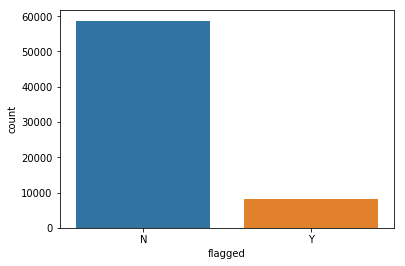

In [24]:
import seaborn as sns
sns.countplot(x = 'flagged', data = combined_df)

In [25]:
#Handling Class Imbalance
#Random Undersampling for ngrams model
min_class_length = len(combined_df[combined_df['flagged_code'] == 1])
maj_class_indices = combined_df[combined_df['flagged_code'] == 0].index
random_maj_class_indices = np.random.choice(maj_class_indices,min_class_length,replace = False)
min_class_indices = combined_df[combined_df['flagged_code'] == 1].index
random_usamp_indices = np.concatenate([min_class_indices,random_maj_class_indices])
text_df = combined_df.loc[random_usamp_indices]

In [26]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16602 entries, 826 to 34948
Data columns (total 32 columns):
reviewerID                      16602 non-null object
reviewContent                   16602 non-null object
ReviewRating                    16602 non-null int64
UsefulCount_Review              16602 non-null int64
flagged                         16602 non-null object
restaurantID                    16602 non-null object
flagged_code                    16602 non-null int32
ReviewID                        16602 non-null int64
WordCount_Review                16602 non-null int64
TotalReviewCountofRestaurant    16602 non-null int64
FakeReviewCountRestaurant       16602 non-null int64
AggRestaurantRating             16602 non-null float64
reviewContentNew                16602 non-null object
stopwordsCount                  16602 non-null int64
DeviationfromAggRating          16602 non-null float64
charCount                       16602 non-null int64
uppercaseCount                  

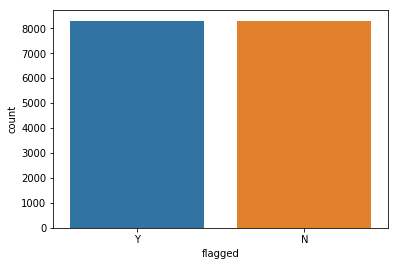

In [27]:
import seaborn as sns
sns.countplot(x = 'flagged', data = text_df)

In [28]:
#Export Random Undersampled Dataset to csv
text_df.to_csv(r'D:\\NCI Notes\\Thesis\\Data\\UndersampledDataset.csv')

In [29]:
#Handling Class Imbalance
#Up-sampling using SMOTE for only numeric features model(Rating Features and Text Based Features)
numeric_df = combined_df.drop(columns=['reviewerID','reviewContent','flagged','ReviewID','restaurantID','reviewContentNew'])
X = numeric_df.drop(columns=['flagged_code','fleschReadingEase',
       'fleschKincaidGrade', 'fogScale', 'smogScore', 'ARI', 'CLI',
       'linsearWrite', 'daleChallScore'])
X = X.iloc[:,:].values
y = numeric_df.iloc[:,numeric_df.columns.get_loc('flagged_code')].values

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_sample(X, y)

In [31]:
#Class instances after upsampling using SMOTE
print("Classes after SMOTE : ")
print("Count of label '1' = {}".format(sum(y==1)))
print("Count of label '0' = {}".format(sum(y==0)))

Classes after SMOTE : 
Count of label '1' = 58715
Count of label '0' = 58715


In [32]:
#Performing feature selection on numeric features using BorutaPy
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
rfc = RandomForestClassifier(n_jobs=-1, class_weight=None, max_depth=7, random_state=0)
feat_selector = BorutaPy(rfc, n_estimators='auto',verbose=2, random_state=0)
feat_selector.fit(X,y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	0
Rejected: 	0


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                          criterion='gini', max_depth=7,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=83, n_jobs=-1,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x0000020DDC1CA1F8>,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         

In [33]:
#Updating feature set for training with selected features
X = X[:,feat_selector.support_]

In [34]:
#Split Dataset for train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 123)

Confusion Matrix: 
[[ 5973  5829]
 [  910 10774]]
Accuracy =  0.7130631014221238
Precision =  0.6489188700837198
Recall =  0.922115713796645
F1 Score =  0.7617633541909712
AUC Score = 0.7141081873507883
Kappa score =  0.42731701822839563
Error rate =  0.2869368985778762
AUC-ROC Curve: 


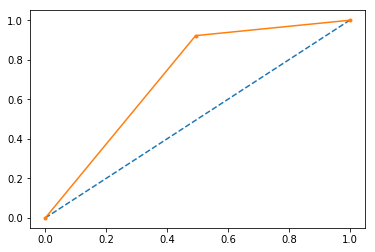

Mean accuracy:  0.7114558457645039
Variance:  0.003897413789036252


In [35]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred_y = gnb.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gnb,10)

Confusion Matrix: 
[[10917   885]
 [ 1612 10072]]
Accuracy =  0.8936813420761305
Precision =  0.9192297161631834
Recall =  0.8620335501540568
F1 Score =  0.8897133518837507
AUC Score = 0.8935231299321377
Kappa score =  0.7872911518848067
Error rate =  0.10631865792386952
AUC-ROC Curve: 


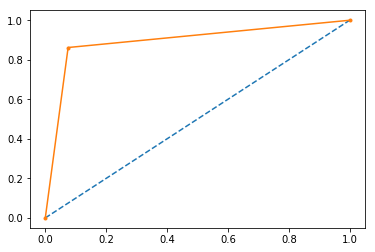

Mean accuracy:  0.8948735395635943
Variance:  0.0038297148537875265


In [36]:
#XGBoost without parameter Tuning
import xgboost as xgb
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train,y_train)
pred_y = xgbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(xgbc,10)

In [37]:
#Hyperparameter Tuning for XGBoost
from sklearn.model_selection import RandomizedSearchCV

parameter = {   
        'max_depth' : np.arange(3,10,1),
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60],
        'eta' : range(1,100,1),
        'subsample' : np.arange(0.5,1,0.01),
        'min_child_weight': range(1,6,1),
        'gamma' : [i/10.0 for i in range(0,5)]
        }

rs = RandomizedSearchCV(
        estimator = xgbc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)

C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   25.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   35.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   57.5s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  2.6min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                        'subsample': array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74

In [38]:
rs.cv_results_

{'mean_fit_time': array([ 6.09137456, 18.13948337, 16.04774443,  6.94774922,  1.30949672,
        20.03142262,  7.38624382,  1.79120819,  7.85233084,  8.62858868,
        21.02543036, 10.42611361,  3.60003694, 20.21493204, 17.09793615,
         9.57838043,  8.7751952 ,  4.92914852, 10.32172664,  1.45577168]),
 'std_fit_time': array([0.02740116, 0.43505762, 0.44521441, 0.03907315, 0.1164987 ,
        0.093092  , 1.20597475, 0.02544003, 0.11041178, 0.0892052 ,
        0.21128789, 0.29378901, 0.06608679, 0.15112952, 1.02799061,
        0.11649966, 0.17444393, 0.05305795, 0.17492914, 0.01298693]),
 'mean_score_time': array([0.04388221, 0.12134298, 0.16156729, 0.07912199, 0.02460082,
        0.16455897, 0.0721403 , 0.02991994, 0.06815068, 0.10039806,
        0.25232522, 0.11702005, 0.05585035, 0.1997989 , 0.17752449,
        0.12134147, 0.07579772, 0.04853702, 0.10771179, 0.03324453]),
 'std_score_time': array([0.00215461, 0.0108123 , 0.00666603, 0.00600238, 0.00124409,
        0.00244357, 

In [39]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Best Parameters: ")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))


Best accuracy Obtained: 0.9273396917312442
Best Parameters: 
	subsample:0.8500000000000003
	n_estimators:74
	min_child_weight:2
	max_depth:8
	learning_rate:0.3
	gamma:0.1
	eta:54


Confusion Matrix: 
[[11521   281]
 [ 1380 10304]]
Accuracy =  0.9292770160946947
Precision =  0.9734529995276334
Recall =  0.8818897637795275
F1 Score =  0.9254120077237415
AUC Score = 0.9290401199850018
Kappa score =  0.8584839176239535
Error rate =  0.07072298390530529
AUC-ROC Curve: 


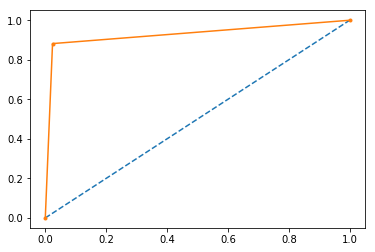

Mean accuracy:  0.9293089571361774
Variance:  0.0015745839604320226


In [40]:
#XGBoost after Parameter tuning
import xgboost as xgb
xgbc = xgb.XGBClassifier(subsample = 0.8500000000000003,
        n_estimators = 74,
        min_child_weight = 2,
        max_depth = 8,
        learning_rate = 0.3,
        gamma = 0.1,
        eta = 54)
xgbc.fit(X_train,y_train)
pred_y = xgbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(xgbc,10)

Confusion Matrix: 
[[ 9947  1855]
 [ 1683 10001]]
Accuracy =  0.8493570637826791
Precision =  0.8435391363022942
Recall =  0.8559568640876413
F1 Score =  0.8497026338147833
AUC Score = 0.8493900571921006
Kappa score =  0.6987286932232253
Error rate =  0.15064293621732094
AUC-ROC Curve: 


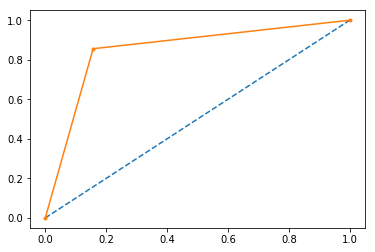

Mean accuracy:  0.8503897086083466
Variance:  0.006031268408444062


In [41]:
#AdaBoost without Parameter tuning
from sklearn.ensemble import AdaBoostClassifier 
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
pred_y = abc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(abc,10)

In [42]:
#Hyperparameter Tuning for AdaBoost
parameter = {
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60,0.70,0.80,0.90,1.0]
        }

rs = RandomizedSearchCV(
        estimator = abc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)

C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   21.3s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   34.5s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   46.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  1.7min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=20, n_jobs=4,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.5, 0.6,
                                                          0.7, 0.8, 0.9, 1.0],
                                        'n_estimators': range(1, 100)},
                   pre_dispatch='2*n_jobs', random_state=10, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=10)

In [43]:
rs.cv_results_

{'mean_fit_time': array([ 0.97738608, 10.56208364,  4.04850451,  8.51156791,  5.75128357,
        11.3895363 ,  4.21306396,  6.75393454,  7.93377884, 10.15982318,
         7.40884852,  2.34572601,  8.97798705,  8.14222105, 11.50057276,
         1.53323118,  7.75691994,  0.73071154,  3.64923779,  3.104702  ]),
 'std_fit_time': array([0.00987208, 0.04248094, 0.00897108, 0.05855267, 0.04886878,
        0.02862838, 0.01365896, 0.03208088, 0.04238326, 0.05581985,
        0.0315863 , 0.03788083, 0.07491296, 0.03527042, 0.07305852,
        0.02217318, 0.04078465, 0.00823791, 0.03939993, 0.12836804]),
 'mean_score_time': array([0.05917581, 0.63629937, 0.23935882, 0.45012808, 0.30584836,
        0.59407767, 0.22174184, 0.34441257, 0.40824167, 0.51495608,
        0.40591447, 0.12200514, 0.46309463, 0.42087619, 0.5714709 ,
        0.08709995, 0.39427829, 0.05186057, 0.18119136, 0.15324879]),
 'std_score_time': array([0.00169402, 0.00407168, 0.00861777, 0.0189638 , 0.01695323,
        0.02418796, 

In [44]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Best Parameters:")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))


Best accuracy Obtained: 0.8566805756620965
Best Parameters:
	n_estimators:72
	learning_rate:0.9


Confusion Matrix: 
[[10000  1802]
 [ 1673 10011]]
Accuracy =  0.8520395129013029
Precision =  0.8474561923304834
Recall =  0.8568127353646011
F1 Score =  0.8521087798442354
AUC Score = 0.852063374969201
Kappa score =  0.704087888270424
Error rate =  0.14796048709869714
AUC-ROC Curve: 


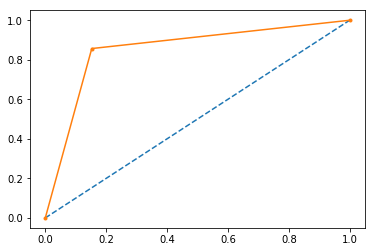

Mean accuracy:  0.855019956805658
Variance:  0.005951948773819657


In [45]:
#After parameter Tuning - AdaBoost
from sklearn.ensemble import AdaBoostClassifier 
abc = AdaBoostClassifier(n_estimators = 72,
                         learning_rate = 0.9)
abc.fit(X_train,y_train)
pred_y = abc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(abc,10)

Confusion Matrix: 
[[11131   671]
 [ 1770  9914]]
Accuracy =  0.896065741292685
Precision =  0.9366084081247048
Recall =  0.8485107839780897
F1 Score =  0.8903857380214648
AUC Score = 0.8958280068000938
Kappa score =  0.792028442456394
Error rate =  0.10393425870731499
AUC-ROC Curve: 


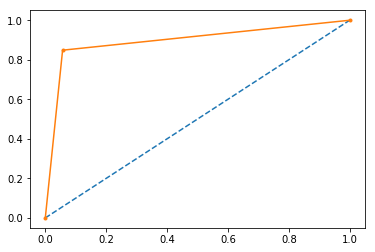

Mean accuracy:  0.8980030800934931
Variance:  0.003449267624302614


In [46]:
#Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred_y = gbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gbc,10)

In [47]:
#HyperParameter Tuning for Gradient Boosting Machine
parameter = {
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60,0.70,0.80,0.90,1.0],
        'subsample' : np.arange(0.5,1,0.01),
        'min_samples_split' : range(50,500,50),
        'min_samples_leaf' : range(10,400,20),
        'max_depth' : np.arange(3,10,1)
        
        }

rs = RandomizedSearchCV(
        estimator = gbc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)

C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   48.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   51.3s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  5.4min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  5.4min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                

In [48]:
rs.cv_results_

{'mean_fit_time': array([46.92253256,  7.74675806, 12.08128222,  2.26268514,  5.03479608,
        14.08413053, 46.27529565, 29.58424107, 13.81946619,  2.46226104,
        47.83344905, 26.10028712, 36.14150771, 18.48519866,  9.21705182,
        11.90974069, 48.16912484, 27.29884402,  9.57626891,  8.02206914]),
 'std_fit_time': array([0.11783453, 0.16214595, 0.33416488, 0.02717845, 0.02333031,
        0.07178918, 0.62623474, 1.43968491, 0.13489534, 0.07470151,
        0.62743396, 0.15273792, 0.55951619, 0.00709255, 0.09514619,
        0.06831246, 0.37319294, 0.24489637, 0.04982589, 1.55839577]),
 'mean_score_time': array([0.19621174, 0.05455438, 0.06913185, 0.02137327, 0.04027001,
        0.06954328, 0.23568869, 0.12201492, 0.0555745 , 0.02426076,
        0.17456285, 0.11878419, 0.13949188, 0.1022052 , 0.04202819,
        0.06644869, 0.21239018, 0.11656356, 0.05149913, 0.03714927]),
 'std_score_time': array([0.01253863, 0.00132616, 0.0015376 , 0.00226304, 0.00277795,
        0.0028359 , 

In [49]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Parameters")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))


Best accuracy Obtained: 0.9272013114195691
Parameters
	subsample:0.7900000000000003
	n_estimators:79
	min_samples_split:300
	min_samples_leaf:10
	max_depth:8
	learning_rate:0.15


Confusion Matrix: 
[[11571   231]
 [ 1460 10224]]
Accuracy =  0.9279996593715405
Precision =  0.9779053084648494
Recall =  0.875042793563848
F1 Score =  0.923618952978906
AUC Score = 0.9277349199135967
Kappa score =  0.8559199199878434
Error rate =  0.0720003406284595
AUC-ROC Curve: 


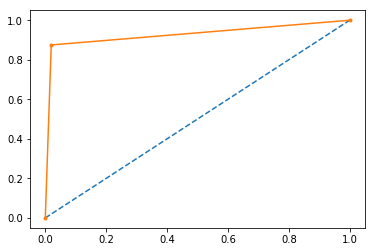

Mean accuracy:  0.9284999550213302
Variance:  0.001942578402890679


In [50]:
#After parameter Tuning Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample = 0.7900000000000003,
        n_estimators = 79,
        min_samples_split = 300,
        min_samples_leaf = 10,
        max_depth = 8,
        learning_rate = 0.15)
gbc.fit(X_train,y_train)
pred_y = gbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gbc,10)

In [51]:
#Adding Readability features in the feature set
X = combined_df.drop(columns=['reviewerID','reviewContent','flagged','flagged_code','ReviewID','restaurantID',
                              'reviewContentNew'])
X = X.iloc[:,:].values
y = combined_df.iloc[:,combined_df.columns.get_loc('flagged_code')].values

In [52]:
#Class instances after upsampling using SMOTE
print("Classes before SMOTE : ")
print("Count of label '1' = {}".format(sum(y==1)))
print("Count of label '0' = {}".format(sum(y==0)))

Classes before SMOTE : 
Count of label '1' = 8301
Count of label '0' = 58715


In [53]:
#Handling Class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_sample(X, y)

In [54]:
#Class instances after upsampling using SMOTE
print("Classes after SMOTE : ")
print("Count of label '1' = {}".format(sum(y==1)))
print("Count of label '0' = {}".format(sum(y==0)))

Classes after SMOTE : 
Count of label '1' = 58715
Count of label '0' = 58715


In [55]:
#Feature Selection using Boruta Py
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
rfc = RandomForestClassifier(n_jobs=-1, class_weight=None, max_depth=7, random_state=0)
feat_selector = BorutaPy(rfc, n_estimators='auto',verbose=2, random_state=0)
feat_selector.fit(X,y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	25
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	25
Tentative: 	0
Rejected: 	0


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                          criterion='gini', max_depth=7,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=101, n_jobs=-1,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x0000020DDD20F558>,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
        

In [56]:
X = X[:,feat_selector.support_]

In [57]:
#Split Dataset for train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 123)

Confusion Matrix: 
[[ 6038  5764]
 [  798 10886]]
Accuracy =  0.7205995060887337
Precision =  0.6538138138138138
Recall =  0.9317014720985963
F1 Score =  0.7684054492835461
AUC Score = 0.7216548370491287
Kappa score =  0.4423697409177825
Error rate =  0.2794004939112663
AUC-ROC Curve: 


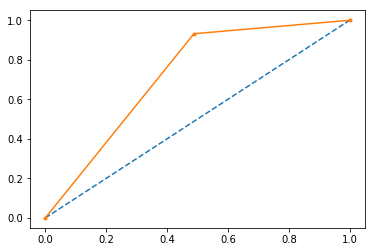

Mean accuracy:  0.7167356168202696
Variance:  0.005020028154938128


In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred_y = gnb.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gnb,10)

Confusion Matrix: 
[[10419  1383]
 [ 1565 10119]]
Accuracy =  0.8744784126713787
Precision =  0.8797600417318727
Recall =  0.8660561451557686
F1 Score =  0.8728543086345207
AUC Score = 0.874436308470106
Kappa score =  0.7489309370068993
Error rate =  0.1255215873286213
AUC-ROC Curve: 


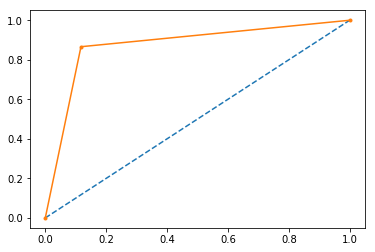

Mean accuracy:  0.8783530684884159
Variance:  0.0036518722660628796


In [59]:
#XGBoost before Hyperparameter Tuning
import xgboost as xgb
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train,y_train)
pred_y = xgbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(xgbc,10)

In [60]:
#Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV

parameter = {   
        'max_depth' : np.arange(3,10,1),
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60],
        'eta' : range(1,100,1),
        'subsample' : np.arange(0.5,1,0.01),
        'min_child_weight': range(1,6,1),
        'gamma' : [i/10.0 for i in range(0,5)]
        }

rs = RandomizedSearchCV(
        estimator = xgbc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)

C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   44.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  5.4min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  5.4min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                        'subsample': array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74

In [61]:
rs.cv_results_

{'mean_fit_time': array([11.10012499, 32.95479862, 31.33921011, 13.3043948 ,  2.6370608 ,
        35.34633255, 13.0548861 ,  3.48634052, 17.27972356, 18.01147238,
        49.00903479, 24.28566472,  7.899647  , 49.86283946, 39.87835606,
        19.87055922, 19.98433153, 10.26574866, 22.13259832,  3.06337857]),
 'std_fit_time': array([0.13157415, 0.18251486, 0.56152948, 0.13016267, 0.01939231,
        0.07166925, 0.22901613, 0.08475681, 0.17696051, 0.23035621,
        0.71822645, 0.41866103, 0.10721848, 0.31176391, 0.69774084,
        0.04146214, 0.308002  , 0.11397523, 0.48417906, 0.14463589]),
 'mean_score_time': array([0.08679692, 0.21755846, 0.23457122, 0.12651833, 0.04278922,
        0.27380713, 0.10838985, 0.06299067, 0.12189905, 0.17570432,
        0.41187342, 0.18460298, 0.09580533, 0.32745425, 0.30513223,
        0.19892685, 0.12265627, 0.08666778, 0.16527788, 0.0499924 ]),
 'std_score_time': array([0.00786713, 0.00200635, 0.01230843, 0.00954778, 0.00527288,
        0.01588873, 

In [62]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Parameters")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))

Best accuracy Obtained: 0.9269671293536575
Parameters
	subsample:0.8500000000000003
	n_estimators:74
	min_child_weight:2
	max_depth:8
	learning_rate:0.3
	gamma:0.1
	eta:54


Confusion Matrix: 
[[11442   360]
 [ 1339 10345]]
Accuracy =  0.9276590309120327
Precision =  0.9663708547407753
Recall =  0.8853988360150633
F1 Score =  0.9241145205234713
AUC Score = 0.9274477657452032
Kappa score =  0.8552537784773264
Error rate =  0.07234096908796728
AUC-ROC Curve: 


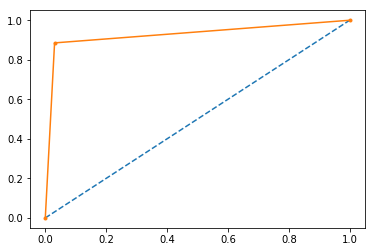

Mean accuracy:  0.9283722252364761
Variance:  0.002178359092400166


In [63]:
#XGBoost after Hyperparameter Tuning
import xgboost as xgb
xgbc = xgb.XGBClassifier(subsample = 0.8500000000000003,
        n_estimators = 74,
        min_child_weight = 2,
        max_depth = 8,
        learning_rate = 0.3,
        gamma = 0.1,
        eta = 54)
xgbc.fit(X_train,y_train)
pred_y = xgbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(xgbc,10)

Confusion Matrix: 
[[9881 1921]
 [1698 9986]]
Accuracy =  0.8459082006301627
Precision =  0.8386663307298228
Recall =  0.8546730571722013
F1 Score =  0.8465940401000381
AUC Score = 0.8459520174862871
Kappa score =  0.6918380243021194
Error rate =  0.1540917993698373
AUC-ROC Curve: 


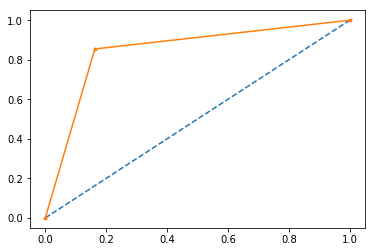

Mean accuracy:  0.8442902733564666
Variance:  0.0032583694933920253


In [64]:
#AdaBoost without parameter Tuning
from sklearn.ensemble import AdaBoostClassifier 
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
pred_y = abc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(abc,10)

In [65]:
#Parameter Tuning - AdaBoost
parameter = {
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60,0.70,0.80,0.90,1.0]
        }

rs = RandomizedSearchCV(
        estimator = abc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)

C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   34.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  5.4min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  5.4min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=20, n_jobs=4,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.5, 0.6,
                                                          0.7, 0.8, 0.9, 1.0],
                                        'n_estimators': range(1, 100)},
                   pre_dispatch='2*n_jobs', random_state=10, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=10)

In [66]:
rs.cv_results_

{'mean_fit_time': array([ 2.98218513, 35.20790346, 13.45642463, 27.19899066, 18.26023889,
        36.68973136, 13.61207422, 21.97850418, 25.73343913, 33.84497992,
        24.33937971,  7.65004063, 29.43889165, 26.63979284, 37.34880845,
         5.1118501 , 25.45800916,  2.35287913, 11.69715047,  9.18513044]),
 'std_fit_time': array([0.04282406, 0.17318756, 0.44876326, 0.07239344, 0.01143949,
        0.2177364 , 0.09422117, 0.18273377, 0.42055333, 0.54713611,
        0.11132879, 0.0341631 , 0.26648395, 0.37519137, 0.24113254,
        0.14374343, 0.1745291 , 0.0535818 , 0.08947619, 0.96326114]),
 'mean_score_time': array([0.1499118 , 1.4563636 , 0.62588962, 1.15833187, 0.7996219 ,
        1.43819435, 0.59713467, 0.85226711, 1.12556338, 1.31455604,
        0.97071425, 0.30980357, 1.16470814, 1.04203041, 1.45792063,
        0.19315314, 1.04904906, 0.10525473, 0.4742562 , 0.34223644]),
 'std_score_time': array([0.01402691, 0.04662462, 0.04158221, 0.0277936 , 0.03875926,
        0.02975008, 

In [67]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Parameters")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))

Best accuracy Obtained: 0.8496870476028272
Parameters
	n_estimators:72
	learning_rate:0.9


Confusion Matrix: 
[[10090  1712]
 [ 1824  9860]]
Accuracy =  0.8494422208975559
Precision =  0.8520566885585897
Recall =  0.843889079082506
F1 Score =  0.847953216374269
AUC Score = 0.8494144598937358
Kappa score =  0.6988624097419383
Error rate =  0.15055777910244406
AUC-ROC Curve: 


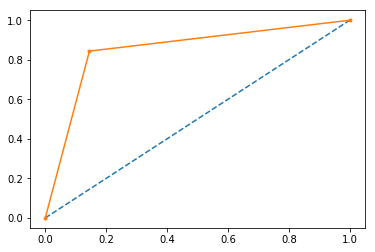

Mean accuracy:  0.8500596223695887
Variance:  0.0034057164352472805


In [68]:
#AdaBoost after tuning
from sklearn.ensemble import AdaBoostClassifier 
abc = AdaBoostClassifier(n_estimators = 72,
                         learning_rate = 0.9)
abc.fit(X_train,y_train)
pred_y = abc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(abc,10)

Confusion Matrix: 
[[10820   982]
 [ 1663 10021]]
Accuracy =  0.8873797155752363
Precision =  0.910751613196401
Recall =  0.8576686066415611
F1 Score =  0.8834134085599683
AUC Score = 0.8872311852052069
Kappa score =  0.7746880949869503
Error rate =  0.11262028442476368
AUC-ROC Curve: 


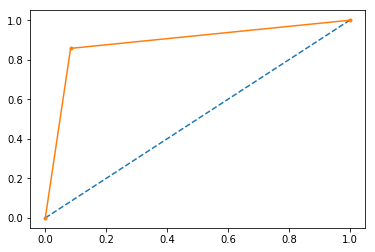

Mean accuracy:  0.8879759999375967
Variance:  0.004587386455268353


In [69]:
#Gradient Boosting Machine without parameter tuning
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred_y = gbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gbc,10)

In [70]:
#Parameter Tuning for Gradient Boosting Machine
parameter = {
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60,0.70,0.80,0.90,1.0],
        'subsample' : np.arange(0.5,1,0.01),
        'min_samples_split' : range(50,500,50),
        'min_samples_leaf' : range(10,400,20),
        'max_depth' : np.arange(3,10,1)
        }

rs = RandomizedSearchCV(
        estimator = gbc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)


C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.6min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  7.7min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  7.7min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                

In [71]:
rs.cv_results_

{'mean_fit_time': array([69.03166723, 10.95887446, 17.71575435,  3.08033419,  7.1024344 ,
        20.08260679, 65.18472616, 38.28134155, 17.19503808,  2.83956599,
        68.6562206 , 35.84970729, 51.45099449, 28.08678842, 14.39181447,
        17.31505577, 70.49934713, 38.17410493, 14.19608665, 13.10404706]),
 'std_fit_time': array([0.61109146, 1.53028716, 0.27326009, 0.03523127, 0.05944947,
        0.2319551 , 0.04927733, 1.25478905, 0.4573551 , 0.22267354,
        0.62799328, 0.93251913, 0.62041104, 0.45219446, 0.13131151,
        0.7222508 , 0.32612746, 0.57227186, 0.1675724 , 0.44760977]),
 'mean_score_time': array([0.20842179, 0.0575273 , 0.07456311, 0.02614633, 0.04283428,
        0.07394616, 0.18712886, 0.10920461, 0.04718661, 0.03672798,
        0.19413273, 0.13542747, 0.14468376, 0.11731291, 0.04983481,
        0.0575761 , 0.21804388, 0.13019816, 0.06065726, 0.05187639]),
 'std_score_time': array([0.00401149, 0.00350533, 0.00305856, 0.00317357, 0.0025985 ,
        0.00038484, 

In [72]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Parameters")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))


Best accuracy Obtained: 0.92633909563144
Parameters
	subsample:0.7900000000000003
	n_estimators:79
	min_samples_split:300
	min_samples_leaf:10
	max_depth:8
	learning_rate:0.15


Confusion Matrix: 
[[11499   303]
 [ 1436 10248]]
Accuracy =  0.9259558886144937
Precision =  0.9712823429058857
Recall =  0.8770968846285518
F1 Score =  0.9217899707668091
AUC Score = 0.9257116349934829
Kappa score =  0.8518362137033377
Error rate =  0.07404411138550626
AUC-ROC Curve: 


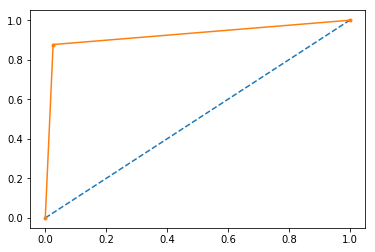

Mean accuracy:  0.9275419680617265
Variance:  0.002345199096070698


In [73]:
#Gradient Boosting after Parameter Tuning
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier( subsample = 0.7900000000000003,
        n_estimators = 79,
        min_samples_split = 300,
        min_samples_leaf = 10,
        max_depth = 8,
        learning_rate = 0.15)
gbc.fit(X_train,y_train)
pred_y = gbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gbc,10)

In [124]:
#Bi-Grams TFIDF and numeric features Model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(ngram_range=(2,2), analyzer='word', min_df = 5)
tv.fit(text_df['reviewContentNew'])
tfidf_bigram_df = tv.fit_transform(text_df['reviewContentNew'])
tfidf_bigram_df = tfidf_bigram_df.toarray()
tfidf_bigram_df = pd.DataFrame(tfidf_bigram_df,columns=tv.get_feature_names())
tfidf_bigram_df = tfidf_bigram_df.reset_index(drop=True)
text_df = text_df.reset_index(drop=True)
combined_bigram_df = pd.concat([text_df,tfidf_bigram_df], axis=1)

In [125]:
combined_bigram_df.head()

,reviewerID,reviewContent,ReviewRating,UsefulCount_Review,flagged,restaurantID,flagged_code,ReviewID,WordCount_Review,TotalReviewCountofRestaurant,...,yummy friend,yummy im,yummy love,yummy meat,yummy pizza,yummy well,yummy yummy,zero star,zucchini flower,zuppa di
0,tfn2U8XfLaJnRD9EXpTxLQ,The food is amazing. I have two tickets for t...,5,0,Y,pbEiXam9YJL3neCYHGwLUA,1,58589,38,841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GHoG4X4FY8D8L563zzPX5w,I did not know what to expect from this restau...,5,0,Y,pbEiXam9YJL3neCYHGwLUA,1,58590,748,841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0bjwIPaxbJDDwZXoVcPNqg,I liked the services offered by (Alinea) resta...,3,0,Y,pbEiXam9YJL3neCYHGwLUA,1,58591,25,841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,D0BzL4qUp3PtGAO12eAExg,I liked the services offered by (Alinea) resta...,4,0,Y,pbEiXam9YJL3neCYHGwLUA,1,58592,25,841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,_JFcE8DVCsCq-A6C727GnA,Presumably one of the best restaurants in Amer...,5,0,Y,pbEiXam9YJL3neCYHGwLUA,1,58593,103,841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
#Dropping unwanted columns
combined_bigram_df = combined_bigram_df.drop(columns=['reviewerID','reviewContent','flagged','restaurantID','ReviewID',
                                                      'reviewContentNew','sentimentScore'])

In [131]:
combined_bigram_df = combined_bigram_df.abs()

In [132]:
#Splitting target varibles and independent variables
X = combined_bigram_df.drop(columns=['flagged_code'])
X = X.iloc[:,:].values
y = combined_bigram_df.iloc[:,combined_bigram_df.columns.get_loc('flagged_code')].values

In [133]:
X.shape

(16602, 26246)

In [134]:
y.shape

(16602,)

In [135]:
#Feature selection by using Chi-Square test
#Chi Square feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi_feature = SelectKBest(chi2, k=4000)
X_KBest = chi_feature.fit_transform(X, y)

In [136]:
#Splitting dataset into train and test after feature selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_KBest,y,test_size = 0.20,random_state = 123)

Confusion Matrix: 
[[ 740  912]
 [  23 1646]]
Accuracy =  0.718458295694068
Precision =  0.6434714620797498
Recall =  0.9862192929898143
F1 Score =  0.7788029335225929
AUC Score = 0.7170805908048346
Kappa score =  0.43535433748122243
Error rate =  0.28154170430593195
AUC-ROC Curve: 


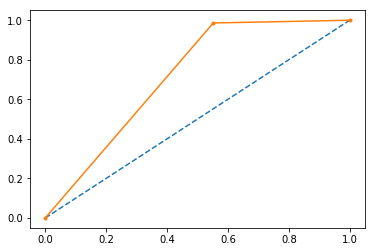

Mean accuracy:  0.7226093105387336
Variance:  0.010223610957702215


In [137]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred_y = gnb.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gnb,10)

Confusion Matrix: 
[[1020  632]
 [ 169 1500]]
Accuracy =  0.7588075880758808
Precision =  0.7035647279549718
Recall =  0.8987417615338527
F1 Score =  0.7892659826361482
AUC Score = 0.7580875877887181
Kappa score =  0.5169129965377313
Error rate =  0.24119241192411922
AUC-ROC Curve: 


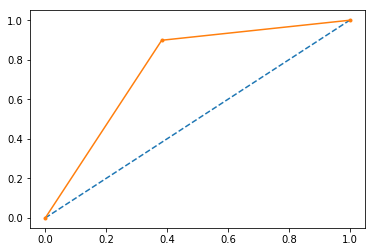

Mean accuracy:  0.7618398278114525
Variance:  0.008258118639968384


In [84]:
#XGBoost before HyperParameter tuning
import xgboost as xgb
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train,y_train)
pred_y = xgbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(xgbc,10)

In [85]:
#Parameter Tuning for XGBoost
from sklearn.model_selection import RandomizedSearchCV

parameter = {   
        'max_depth' : np.arange(3,10,1),
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60,0.70,0.80,0.90],
        'eta' : range(1,100,1),
        'subsample' : np.arange(0.5,1,0.01),
        'min_child_weight': range(1,6,1),
        'gamma' : [i/10.0 for i in range(0,5)]
        }

rs = RandomizedSearchCV(
        estimator = xgbc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)

C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 12.3min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 14.6min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 19.5min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 26.9min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 29.0min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 29.0min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                        'subsample': array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74

In [86]:
rs.cv_results_

{'mean_fit_time': array([ 78.80967943, 168.87390534, 175.28901998,  89.43530901,
        104.64325984,  19.53354692, 237.79974842,  89.97690423,
         32.25927234, 118.20815492,  28.62230698, 104.24765929,
         94.57972685, 110.00973884, 285.24383211, 130.56055872,
         29.12921985, 254.93494423,  65.35929807,  60.45503139]),
 'std_fit_time': array([0.19446826, 3.00057373, 2.93959026, 3.56881658, 1.14797882,
        0.19595236, 2.17318655, 5.11436444, 1.0218685 , 0.12808919,
        0.03165177, 0.0875093 , 0.12814456, 0.1146389 , 0.25365012,
        8.94731364, 0.27552692, 0.91990235, 1.09828343, 0.72499514]),
 'mean_score_time': array([0.34410826, 0.34703811, 0.41607181, 0.29467718, 0.39955624,
        0.38593626, 0.31463496, 0.38033088, 0.34644604, 0.37320216,
        0.35788417, 0.37358379, 0.36546342, 0.37750379, 0.40197182,
        0.39140614, 0.40497565, 0.42065287, 0.3824993 , 0.36164244]),
 'std_score_time': array([0.01334902, 0.06771855, 0.0028863 , 0.06621206, 0.00

In [87]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Parameters")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))


Best accuracy Obtained: 0.763346133574279
Parameters
	subsample:0.54
	n_estimators:43
	min_child_weight:3
	max_depth:5
	learning_rate:0.1
	gamma:0.1
	eta:77


Confusion Matrix: 
[[1026  626]
 [ 176 1493]]
Accuracy =  0.7585064739536285
Precision =  0.7045776309579991
Recall =  0.8945476333133613
F1 Score =  0.7882787750791975
AUC Score = 0.7578065043080123
Kappa score =  0.5163293034736066
Error rate =  0.24149352604637153
AUC-ROC Curve: 


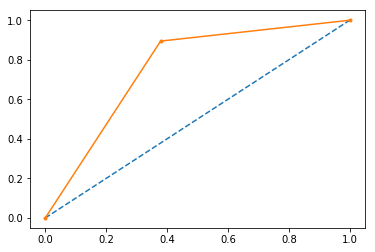

Mean accuracy:  0.7625905148335445
Variance:  0.010763698670423733


In [88]:
#XGBoost after parameter Tuning
import xgboost as xgb
xgbc = xgb.XGBClassifier(subsample = 0.54,
        n_estimators = 43,
        min_child_weight = 3,
        max_depth = 5,
        learning_rate = 0.1,
        gamma = 0.1,
        eta = 77)
xgbc.fit(X_train,y_train)
pred_y = xgbc.predict(X_test)
model_report(y_test,pred_y) 
KFold_Cross_Validation(xgbc,10)

Confusion Matrix: 
[[1079  573]
 [ 238 1431]]
Accuracy =  0.7557964468533575
Precision =  0.7140718562874252
Recall =  0.8573996405032954
F1 Score =  0.779199564388783
AUC Score = 0.7552736701305822
Kappa score =  0.5110751557405484
Error rate =  0.24420355314664255
AUC-ROC Curve: 


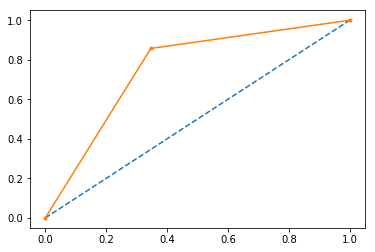

Mean accuracy:  0.7513727888243039
Variance:  0.010597097839562667


In [89]:
#AdaBoost before parameter tuning
from sklearn.ensemble import AdaBoostClassifier 
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
pred_y = abc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(abc,10)

In [90]:
#Parameter Tuning AdaBoost
parameter = {
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60,0.70,0.80,0.90,1.0]
        }

rs = RandomizedSearchCV(
        estimator = abc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)

C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 14.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 16.3min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 17.5min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 17.5min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=20, n_jobs=4,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.5, 0.6,
                                                          0.7, 0.8, 0.9, 1.0],
                                        'n_estimators': range(1, 100)},
                   pre_dispatch='2*n_jobs', random_state=10, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=10)

In [91]:
rs.cv_results_

{'mean_fit_time': array([ 14.54199664, 120.23567184,  44.65975944,  80.3850015 ,
         54.03481102, 108.92101137,  41.41024311,  67.87578901,
         80.32383148, 102.30337699,  76.17991432,  24.66270264,
         87.03089166,  78.79126374, 113.68977992,  16.73557234,
         82.58402467,   8.58969124,  37.96878028,  31.26670742]),
 'std_fit_time': array([0.0905602 , 2.08507799, 8.07132812, 0.01763571, 0.04056399,
        0.67974481, 0.7503979 , 0.47883306, 0.2797688 , 0.66307004,
        0.74442934, 0.24962028, 0.35495497, 0.27288418, 2.98922924,
        0.38213402, 0.19059339, 0.01629274, 0.05930758, 2.14620307]),
 'mean_score_time': array([ 1.17054582,  8.39720686,  3.4035631 ,  6.56809878,  4.41851409,
         8.91149823,  3.47503948,  5.89490008,  6.62561194,  9.26289241,
         6.12694645,  2.01793543,  7.14588714,  6.75160861, 10.21035838,
         1.42618569,  7.08571529,  0.74534059,  3.25063928,  2.1745166 ]),
 'std_score_time': array([0.00784494, 0.21577206, 0.237189

In [92]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Parameters")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))

Best accuracy Obtained: 0.7574730818462465
Parameters
	n_estimators:77
	learning_rate:0.3


Confusion Matrix: 
[[ 982  670]
 [ 150 1519]]
Accuracy =  0.7530864197530864
Precision =  0.6939241662859753
Recall =  0.9101258238466148
F1 Score =  0.7874546397096942
AUC Score = 0.7522784082913462
Kappa score =  0.5053669615456152
Error rate =  0.24691358024691357
AUC-ROC Curve: 


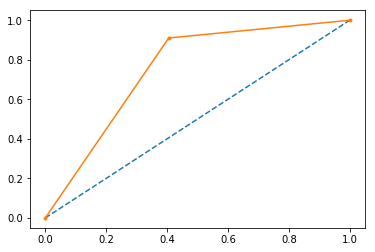

Mean accuracy:  0.7578488066982121
Variance:  0.010935763050374438


In [93]:
#After parameter Tuning - AdaBoost
from sklearn.ensemble import AdaBoostClassifier 
abc = AdaBoostClassifier(n_estimators = 77,
                         learning_rate = 0.3)
abc.fit(X_train,y_train)
pred_y = abc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(abc,10)

Confusion Matrix: 
[[1026  626]
 [ 189 1480]]
Accuracy =  0.7545919903643481
Precision =  0.7027540360873694
Recall =  0.8867585380467345
F1 Score =  0.7841059602649008
AUC Score = 0.753911956674699
Kappa score =  0.5085089796578757
Error rate =  0.2454080096356519
AUC-ROC Curve: 


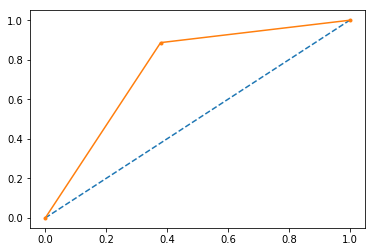

Mean accuracy:  0.7616138675369458
Variance:  0.009616963197733728


In [94]:
#Gradient Boosting Machine before tuning
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred_y = gbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gbc,10)

In [95]:
#Parameter Tuning GradientBoosting
parameter = {
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60,0.70,0.80,0.90,1.0],
        'subsample' : np.arange(0.5,1,0.01),
        'min_samples_split' : range(50,500,50),
        'min_samples_leaf' : range(10,400,20),
        'max_depth' : np.arange(3,10,1)
        
        }

rs = RandomizedSearchCV(
        estimator = gbc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)

C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 18.7min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 26.4min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 34.6min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 44.3min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 46.9min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 46.9min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                

In [96]:
rs.cv_results_

{'mean_fit_time': array([414.25312797,  65.26145522, 136.004421  ,  24.02898765,
         56.20030308, 129.10481954, 330.31364957, 332.05750902,
        118.64015237,  17.12347794, 371.49601396, 238.9248236 ,
        292.38699587, 194.67465178,  94.68774573, 122.87203066,
        390.56106456, 265.09799639,  67.19295096,  70.11416984]),
 'std_fit_time': array([ 1.61435568,  1.00375519,  2.22676176,  0.64159304,  0.16004297,
         0.87874763,  2.63623544, 10.02536742,  3.01359788,  0.37276864,
         2.77665492,  1.88131206,  2.4582738 ,  2.12339252,  0.68170899,
         1.5168496 ,  0.92684792,  2.46568512,  1.29087632,  0.61765124]),
 'mean_score_time': array([0.21274344, 0.17656525, 0.19602879, 0.1396757 , 0.16258645,
        0.18728757, 0.22485979, 0.16688196, 0.15668718, 0.19179296,
        0.16555794, 0.1658903 , 0.18650103, 0.16057134, 0.12998629,
        0.14461311, 0.1871655 , 0.1363109 , 0.1359698 , 0.11702085]),
 'std_score_time': array([0.01693008, 0.01811435, 0.005549

In [97]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Parameters")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))

Best accuracy Obtained: 0.7656802951584971
Parameters
	subsample:0.7900000000000003
	n_estimators:79
	min_samples_split:300
	min_samples_leaf:10
	max_depth:8
	learning_rate:0.15


Confusion Matrix: 
[[1081  571]
 [ 224 1445]]
Accuracy =  0.7606142728093948
Precision =  0.716765873015873
Recall =  0.865787896944278
F1 Score =  0.7842605156037992
AUC Score = 0.760073125227587
Kappa score =  0.5207032724290217
Error rate =  0.23938572719060525
AUC-ROC Curve: 


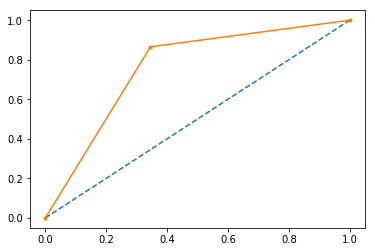

Mean accuracy:  0.7663561996159803
Variance:  0.01148336204769523


In [98]:
#Gradient Boosting Machine after tuning
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample = 0.7900000000000003,
        n_estimators = 79,
        min_samples_split = 300,
        min_samples_leaf = 10,
        max_depth = 8,
        learning_rate = 0.15)
gbc.fit(X_train,y_train)
pred_y = gbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gbc,10)

In [99]:
#TFIDF Trigram model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(ngram_range=(3,3), analyzer='word', min_df = 2)
tv.fit(text_df['reviewContentNew'])
tfidf_trigram_df = tv.fit_transform(text_df['reviewContentNew'])
tfidf_trigram_df = tfidf_trigram_df.toarray()
tfidf_trigram_df = pd.DataFrame(tfidf_trigram_df,columns=tv.get_feature_names())
tfidf_trigram_df = tfidf_trigram_df.reset_index(drop=True)
text_df = text_df.reset_index(drop=True)
combined_trigram_df = pd.concat([text_df,tfidf_trigram_df], axis=1)

In [100]:
#Dropping unwanted columns
combined_trigram_df = combined_trigram_df.drop(columns=['reviewerID','reviewContent','flagged','restaurantID','ReviewID',
                                                      'reviewContentNew','sentimentScore'])

In [101]:
combined_trigram_df = combined_trigram_df.abs()

In [102]:
#Splitting target varibles and independent variables
X = combined_trigram_df.drop(columns=['flagged_code'])
X = X.iloc[:,:].values
y = combined_trigram_df.iloc[:,combined_trigram_df.columns.get_loc('flagged_code')].values

In [103]:
X.shape

(16602, 36124)

In [104]:
y.shape

(16602,)

In [105]:
#Feature selection using Chi-Square test
#Chi Square feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi_feature = SelectKBest(chi2, k=3000)
X_KBest = chi_feature.fit_transform(X, y)

In [106]:
#Splitting after feature selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_KBest,y,test_size = 0.20,random_state = 123)

Confusion Matrix: 
[[1137  515]
 [ 114 1555]]
Accuracy =  0.8105992171032822
Precision =  0.751207729468599
Recall =  0.9316956261234272
F1 Score =  0.8317732013907462
AUC Score = 0.8099761423595344
Kappa score =  0.620719632781056
Error rate =  0.1894007828967178
AUC-ROC Curve: 


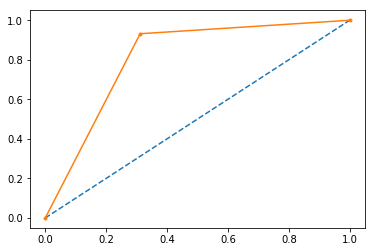

Mean accuracy:  0.8106326347045991
Variance:  0.011471124886521704


In [107]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred_y = gnb.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gnb,10)

Confusion Matrix: 
[[1039  613]
 [ 193 1476]]
Accuracy =  0.7573020174646191
Precision =  0.7065581617999043
Recall =  0.8843618933493109
F1 Score =  0.7855242150079831
AUC Score = 0.7566482590233238
Kappa score =  0.51396199472839
Error rate =  0.24269798253538089
AUC-ROC Curve: 


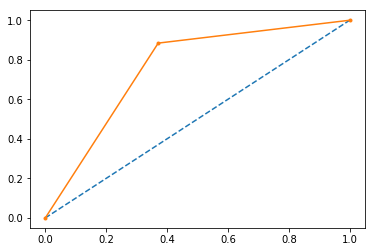

Mean accuracy:  0.7622907277964222
Variance:  0.00887702647350463


In [108]:
#XGBoost before HyperParameter tuning
import xgboost as xgb
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train,y_train)
pred_y = xgbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(xgbc,10)

In [109]:
#Parameter Tuning - XGBoost
from sklearn.model_selection import RandomizedSearchCV

parameter = {   
        'max_depth' : np.arange(3,10,1),
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60],
        'eta' : range(1,100,1),
        'subsample' : np.arange(0.5,1,0.01),
        'min_child_weight': range(1,6,1),
        'gamma' : [i/10.0 for i in range(0,5)]
        }

rs = RandomizedSearchCV(
        estimator = xgbc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)

C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  8.3min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 13.9min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 18.2min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 22.1min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 23.7min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 23.7min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                        'subsample': array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74

In [110]:
rs.cv_results_

{'mean_fit_time': array([ 53.0993638 , 106.03821572, 122.06536992,  65.32105382,
         13.60767094, 168.42726215,  70.2089177 ,  20.37116623,
         82.28134227,  94.42736705, 238.89428854, 106.99795683,
         43.9030207 , 194.03523429, 143.74920527, 100.0850416 ,
         71.63123973,  47.85658177, 100.40961607,  16.25214148]),
 'std_fit_time': array([ 0.26075758,  1.24440458, 13.22350287,  0.60375985,  0.08189428,
         1.65200859,  0.46003091,  1.04039238,  0.63682359,  0.65220057,
         5.38028189,  5.55906885,  0.6974181 ,  1.95590614,  2.83948772,
         0.52158764,  0.52968397,  0.33476489,  2.13476653,  1.23924327]),
 'mean_score_time': array([0.21859296, 0.28977903, 0.30206919, 0.27575294, 0.26237273,
        0.27897255, 0.26725864, 0.24090258, 0.33108457, 0.33494099,
        0.33887084, 0.30323394, 0.28584711, 0.31796241, 0.3086044 ,
        0.2527353 , 0.28122044, 0.27258595, 0.27951797, 0.26437243]),
 'std_score_time': array([0.05212643, 0.00553499, 0.015398

In [111]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Parameters")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))

Best accuracy Obtained: 0.764023793389052
Parameters
	subsample:0.8400000000000003
	n_estimators:58
	min_child_weight:3
	max_depth:4
	learning_rate:0.1
	gamma:0.4
	eta:83


Confusion Matrix: 
[[1041  611]
 [ 187 1482]]
Accuracy =  0.7597109304426377
Precision =  0.7080745341614907
Recall =  0.8879568603954464
F1 Score =  0.7878787878787878
AUC Score = 0.7590510694229048
Kappa score =  0.518780251483158
Error rate =  0.2402890695573623
AUC-ROC Curve: 


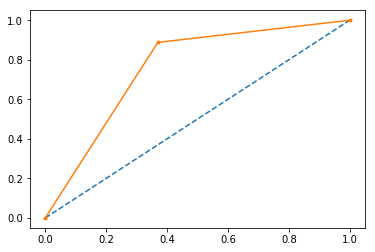

Mean accuracy:  0.7628172127134334
Variance:  0.008878682622188218


In [112]:
#XGBoost After Tuning
import xgboost as xgb
xgbc = xgb.XGBClassifier(subsample = 0.8400000000000003,
        n_estimators = 58,
        min_child_weight = 3,
        max_depth = 4,
        learning_rate = 0.1,
        gamma = 0.4,
        eta = 83)
xgbc.fit(X_train,y_train)
pred_y = xgbc.predict(X_test)
model_report(y_test,pred_y) 
KFold_Cross_Validation(xgbc,10)

Confusion Matrix: 
[[1074  578]
 [ 248 1421]]
Accuracy =  0.7512797350195725
Precision =  0.7108554277138569
Recall =  0.8514080287597364
F1 Score =  0.7748091603053435
AUC Score = 0.7507645470675195
Kappa score =  0.5020398397753689
Error rate =  0.24872026498042754
AUC-ROC Curve: 


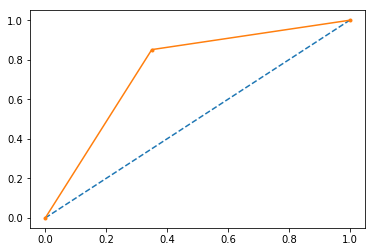

Mean accuracy:  0.7593532997777409
Variance:  0.007582090185520406


In [113]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier 
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
pred_y = abc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(abc,10)

In [114]:
#Parameter Tuning AdaBoost
parameter = {
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60,0.70,0.80,0.90,1.0]
        }

rs = RandomizedSearchCV(
        estimator = abc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)

C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 10.4min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 13.6min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 15.6min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 16.6min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 16.6min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=20, n_jobs=4,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.5, 0.6,
                                                          0.7, 0.8, 0.9, 1.0],
                                        'n_estimators': range(1, 100)},
                   pre_dispatch='2*n_jobs', random_state=10, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=10)

In [115]:
rs.cv_results_

{'mean_fit_time': array([ 10.47598092, 102.24535664,  39.38436349,  81.270329  ,
         54.75315666, 109.02254526,  41.28139242,  65.80580298,
         77.02581127,  98.84467085,  72.05589644,  23.63498847,
         84.7724661 ,  79.86305435, 109.2201155 ,  15.35039632,
         70.85913356,   7.76621699,  33.44061844,  26.40018272]),
 'std_fit_time': array([0.0813427 , 0.22843312, 0.38302509, 0.20779556, 0.21782556,
        0.09284916, 0.11093028, 0.1719198 , 0.17726214, 0.14608988,
        0.3363582 , 0.05957151, 0.09301082, 1.34247335, 3.4823739 ,
        0.4252354 , 0.10427888, 0.05188276, 0.39248959, 1.62074944]),
 'mean_score_time': array([0.89532272, 9.06170734, 3.51389949, 7.19914993, 4.82357613,
        9.74880544, 3.63812804, 5.86678259, 6.87064997, 8.8725903 ,
        6.31144102, 1.91265106, 7.84793711, 7.03457681, 8.56893023,
        1.21669992, 6.56677365, 0.62213715, 2.3328197 , 1.93739891]),
 'std_score_time': array([0.00567083, 0.01951731, 0.07600586, 0.00997511, 0.04

In [116]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Parameters")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))

Best accuracy Obtained: 0.7617649273398087
Parameters
	n_estimators:98
	learning_rate:0.6


Confusion Matrix: 
[[1043  609]
 [ 208 1461]]
Accuracy =  0.7539897621198434
Precision =  0.7057971014492753
Recall =  0.8753744757339724
F1 Score =  0.7814923776410805
AUC Score = 0.7533652039686811
Kappa score =  0.5073576152338994
Error rate =  0.24601023788015663
AUC-ROC Curve: 


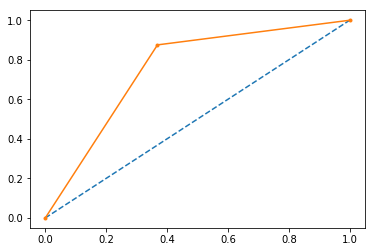

Mean accuracy:  0.7604836688609058
Variance:  0.010057241634117453


In [117]:
#After parameter Tuning - AdaBoost
from sklearn.ensemble import AdaBoostClassifier 
abc = AdaBoostClassifier(n_estimators = 98,
                         learning_rate = 0.6)
abc.fit(X_train,y_train)
pred_y = abc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(abc,10)

Confusion Matrix: 
[[1039  613]
 [ 180 1489]]
Accuracy =  0.7612165010538994
Precision =  0.7083729781160799
Recall =  0.8921509886159377
F1 Score =  0.7897109520021216
AUC Score = 0.7605428066566372
Kappa score =  0.5217821269780453
Error rate =  0.23878349894610063
AUC-ROC Curve: 


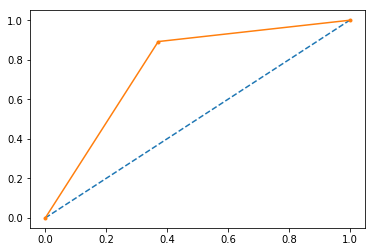

Mean accuracy:  0.7625914224190733
Variance:  0.009196500418565592


In [118]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred_y = gbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gbc,10)

In [119]:
#Parameter Tuning Gradient Boosting Machine
parameter = {
        'n_estimators' : range(1,100,1),
        'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.60,0.70,0.80,0.90,1.0],
        'subsample' : np.arange(0.5,1,0.01),
        'min_samples_split' : range(50,500,50),
        'min_samples_leaf' : range(10,400,20),
        'max_depth' : np.arange(3,10,1)
        
        }

rs = RandomizedSearchCV(
        estimator = gbc,
        param_distributions = parameter,
        n_iter = 20,
        scoring ='accuracy',
        n_jobs=4,
        verbose=10,
        random_state=10
        )

rs.fit(X_train,y_train)

C:\Users\Siddhanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 11.0min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 16.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 22.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 28.6min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 30.6min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 30.6min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                

In [120]:
rs.cv_results_

{'mean_fit_time': array([224.69387698,  35.89333161,  81.03510857,  14.74473429,
         33.48826981,  71.81458966, 185.61421919, 209.4591101 ,
         71.35382096,  10.22963834, 275.30333662, 165.96909571,
        195.84204777, 161.31305448,  76.22911509,  94.05643344,
        247.74770315, 168.06016906,  47.01192784,  42.71642033]),
 'std_fit_time': array([2.88769907, 1.70487237, 1.2010981 , 0.15506755, 0.5498669 ,
        1.0674282 , 0.21736195, 1.30215879, 0.54411291, 0.25857034,
        0.98974603, 1.52065241, 5.8999438 , 1.3635166 , 1.2086194 ,
        1.10168054, 1.73024878, 0.74299769, 1.35814271, 3.79714291]),
 'mean_score_time': array([0.16389505, 0.12333663, 0.13364291, 0.11037374, 0.12865583,
        0.12699366, 0.1466078 , 0.14561041, 0.13696734, 0.12100951,
        0.16688577, 0.14394784, 0.15159575, 0.16921377, 0.1133639 ,
        0.12366978, 0.15924048, 0.13729914, 0.11968112, 0.10105952]),
 'std_score_time': array([0.00734305, 0.02079772, 0.00508416, 0.00328791, 0.00

In [121]:
print("Best accuracy Obtained: {0}".format(rs.best_score_))
print("Parameters")
for key, value in rs.best_params_.items():
    print("\t{}:{}".format(key, value))


Best accuracy Obtained: 0.7622167005496574
Parameters
	subsample:0.7000000000000002
	n_estimators:62
	min_samples_split:350
	min_samples_leaf:190
	max_depth:3
	learning_rate:0.15


Confusion Matrix: 
[[1063  589]
 [ 230 1439]]
Accuracy =  0.7533875338753387
Precision =  0.7095660749506904
Recall =  0.8621929298981426
F1 Score =  0.7784690289423856
AUC Score = 0.7528276998158994
Kappa score =  0.5062156505314823
Error rate =  0.24661246612466126
AUC-ROC Curve: 


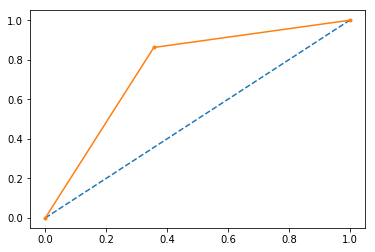

Mean accuracy:  0.7619892395061096
Variance:  0.009767382072358858


In [122]:
#Gradient Boosting Machine after parameter tuning
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample = 0.7000000000000002,
        n_estimators = 62,
        min_samples_split = 350,
        min_samples_leaf = 190,
        max_depth = 3,
        learning_rate = 0.15)
gbc.fit(X_train,y_train)
pred_y = gbc.predict(X_test)
model_report(y_test,pred_y)
KFold_Cross_Validation(gbc,10)

In [123]:
text_df.columns

Index(['reviewerID', 'reviewContent', 'ReviewRating', 'UsefulCount_Review',
       'flagged', 'restaurantID', 'flagged_code', 'ReviewID',
       'WordCount_Review', 'TotalReviewCountofRestaurant',
       'FakeReviewCountRestaurant', 'AggRestaurantRating', 'reviewContentNew',
       'stopwordsCount', 'DeviationfromAggRating', 'charCount',
       'uppercaseCount', 'specialCharCount', 'sentenceCount',
       'fleschReadingEase', 'fleschKincaidGrade', 'fogScale', 'smogScore',
       'ARI', 'CLI', 'linsearWrite', 'daleChallScore', 'sentimentScore',
       'nounCount', 'verbCount', 'adjectiveCount', 'adverbCount'],
      dtype='object')